In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import math
from skimpy import skim

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib as mlp

sns.set_theme(style='darkgrid', palette='mako')

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 15

In [4]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

In [5]:
RANDOM = 42

# LOADING DATA

In [6]:
cargotype_info = pd.read_csv('data/cargotype_info.csv', index_col='Unnamed: 0')
carton_price = pd.read_excel('data/carton_price.xlsx')
carton = pd.read_csv('data/carton.csv')
data = pd.read_csv('data/data.csv', index_col='Unnamed: 0')
sku_cargotypes = pd.read_csv('data/sku_cargotypes.csv', index_col='Unnamed: 0')
sku = pd.read_csv('data/sku.csv', index_col='Unnamed: 0')

In [93]:
cargotype_info

,cargotype,description
0,770.0,консервы
1,301.0,тяжеловесный и крупногабаритный 20кг
2,980.0,Требует обязательной маркировки
3,985.0,"Не требует наличия маркировки, но требует выво..."
4,990.0,Потребует обязательной маркировки в ближайшем ...
5,910.0,интим товар
6,900.0,медикаменты
7,10.0,документы и ценные бумаги
8,50.0,предметы искусства
9,100.0,товары народного потребления


In [7]:
data.sample(5)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
25440,0,18afc65fb03d220d6d8e5fe19991e6f6,MYE,1,YMX,MYE,26277,YMX,16422,46800,0.257,e4d0de08082d04532e83dd0697ea727f,3b03332360fe50db6ce311bbeb983e81,1bcc3d6bc66048c4aff0c453b0075cb3
255736,3,deb364f384fce38285c79d86258bc1da,MYA,1,MYA,MYA,999,MYA,80,999,0.035,c6cf5c473a40ad87edd6c1034374cfdb,080f97c97a35abc10012bd934a05c1fc,b4b1262a37fb9e162e374c8b3a27b4f8
252392,3,1ff1b99a19f85dcf464cfde56f9586ef,YMG,1,YMG,YMG,26153,YMG,6630,26153,0.965,740c60be2a404e29628aaafd736a8313,9ffe7bd1615a2a01e6c62903557f6f94,fc1c3ad50bce9a869a262b1cc4a7466b
281518,4,dfce2130fbf1601c8b862ae473bdea20,MYA,1,MYC,MYA,999,MYC,1650,8436,0.220,f880054f77d3c4fb2b03d76ccffe3605,2bb54110a62fa9608957fab3f845c2f1,d6fe00202328f0b017e7aa470a736513
45258,0,908ff5c4cd00bda2ab623568cf5e026c,NONPACK,2,YMW,NONPACK,0,YMW,7140,18000,4.930,be688ef02fdc7a353baa8ba3db138614,83fc2a8707f2aea98608f9981673671c,05c7b476a883a73f9367c339b646549f


<Axes: >

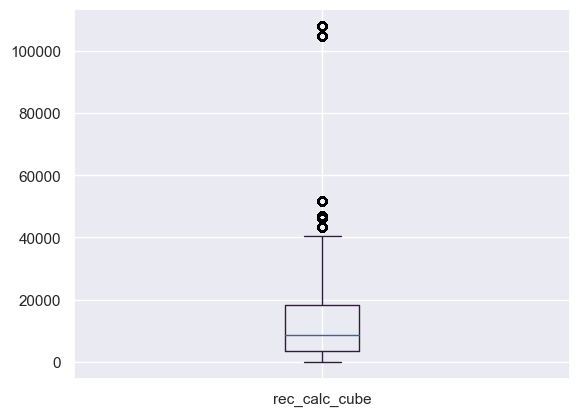

In [8]:
data['rec_calc_cube'].plot(kind='box')

<Axes: >

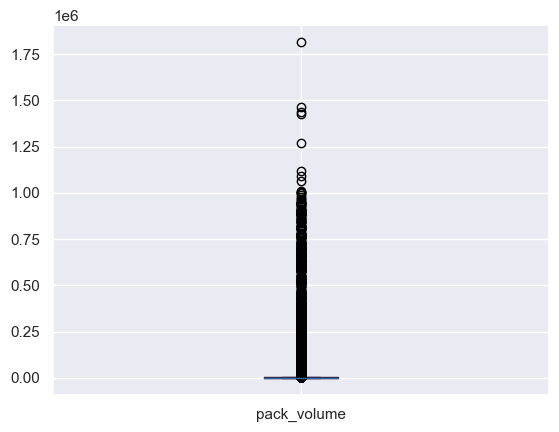

In [9]:
data['pack_volume'].plot(kind='box')

In [10]:
mb_not_important = [690, 691, 692, 931, 930, 350, 920, 292, 291, 290, 303, 302, 110, 752, 751, 410, 799, 20, 400, 0, 780, 760, 510, 150, 790, 950, 990, 985, 301]

In [11]:
carton_price.columns = ['cartontype', 'price']

In [12]:
carton.columns = [s.lower() for s in carton.columns]

In [97]:
data[['sku', 'selected_cartontype']]

,sku,selected_cartontype
0,af49bf330e2cf16e44f0be1bdfe337bd,NONPACK
1,af49bf330e2cf16e44f0be1bdfe337bd,NONPACK
2,af49bf330e2cf16e44f0be1bdfe337bd,NONPACK
3,af49bf330e2cf16e44f0be1bdfe337bd,NONPACK
4,af49bf330e2cf16e44f0be1bdfe337bd,NONPACK
...,...,...
325618,86dcc1a44eb2939fea4d2dd3604e1f9e,MYC
325619,86dcc1a44eb2939fea4d2dd3604e1f9e,MYC
325620,9db21acf9e6c1a66493c246c1461f989,YMC
325621,4aedb72c5662562524f6119918c7179b,MYB


In [103]:
#для нейронки
from sklearn.preprocessing import LabelEncoder
# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем столбец с классами в числа
# y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.transform(y_test)

In [105]:
corr_test['selected_cartontype'] = label_encoder.fit_transform(corr_test['selected_cartontype'])

In [106]:
corr_test

,sku,cargotype,selected_cartontype
0,4862bf0e760a593b13f3f2fcf822e533,290,17
1,4862bf0e760a593b13f3f2fcf822e533,901,17
2,50d3c4fc66ad423b7feaadff2d682ee0,290,17
3,50d3c4fc66ad423b7feaadff2d682ee0,901,17
4,24ce9dba9f301ada55f60e25ee1498d2,290,17
...,...,...,...
22179742,5786e5c2309967c64b10e443ce1a807c,691,1
22179743,859788a147004b9a1d24a8168460f79a,200,17
22179744,859788a147004b9a1d24a8168460f79a,290,17
22179745,859788a147004b9a1d24a8168460f79a,310,17


In [99]:
corr_test = pd.merge(sku_cargotypes, data[['sku', 'selected_cartontype']], on='sku', how='left')

In [107]:
corr_test['selected_cartontype'].value_counts()

17    20719751
1       238549
2       214144
10      133978
13      119352
6       113453
3       103663
15       94872
12       93005
0        84781
8        77057
11       65961
7        55215
4        38970
14       16736
5         6299
16        3955
9            6
Name: selected_cartontype, dtype: int64

In [13]:
sku_cargotypes.head()

,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290


In [14]:
sku_cargotypes_filtred = pd.merge(data[['sku']].drop_duplicates(), sku_cargotypes, on='sku', how='left') # дропаем тех которых у нас нет
sku_cargotypes_filtred = sku_cargotypes_filtred.query('cargotype not in @mb_not_important') # дропаем как мне кажется не особо важные
sku_groups = sku_cargotypes_filtred.groupby('sku')['cargotype'].apply(list).reset_index()
#sku_groups = pd.merge(data[['sku']].drop_duplicates(), sku_groups, on='sku', how='left') # 
sku_groups.head()

,sku,cargotype
0,00001dba9dfe01a550c23064c2b8e96f,[nan]
1,000198cfae123aef536f2fcf0b104049,"[310.0, 720.0, 750.0, 770.0]"
2,0003da69535758c817b78b64da05aae0,"[310.0, 340.0, 750.0]"
3,0003fb4df9f32661d8772b1eac96e5ea,"[600.0, 610.0, 960.0, 970.0, 980.0]"
4,0005b21e4cba70e646f9f8f9a5d88d4e,"[440.0, 441.0, 480.0, 490.0, 520.0]"


In [15]:
def gen_geometry_feat(df, a, b, c):
    '''
    генерим геометрические фичи
    a, b, c -- размеры
    '''
    df['dim_sum'] = df[[a, b, c]].sum(axis=1)
    df['vol'] = np.floor(df[[a, b, c]].prod(axis=1))
    df['dim_mean'] = np.floor(df[[a, b, c]].mean(axis=1))
    df['dim_median'] = np.floor(df[[a, b, c]].median(axis=1))

    df['prod_a_b'] = np.floor(df[[a, b]].prod(axis=1))
    df['prod_a_c'] = np.floor(df[[a, c]].prod(axis=1))
    df['prod_b_c'] = np.floor(df[[b, c]].prod(axis=1))
    df['prod_min'] = df[['prod_a_b', 'prod_a_c', 'prod_b_c']].min(axis=1)
    df['prod_mean'] = np.floor(df[['prod_a_b', 'prod_a_c', 'prod_b_c']].mean(axis=1))

    df['diag'] = round(np.sqrt(df[a]**2 + df[b]**2 + df[c]**2), 1)
    return df

In [16]:
sku = gen_geometry_feat(sku, 'a', 'b', 'c')
carton = gen_geometry_feat(carton, 'length', 'width', 'height')

In [17]:
non_volume = ['KSD', 'NONPACK', 'STRETCH'] # нулевой объем помешает потом

In [18]:
# фичи для упаковок, для сравнения с фичами заказа
new_carton = carton.query('cartontype not in @non_volume').set_index('cartontype').unstack().reset_index()
new_carton = new_carton.rename(columns={
    'level_0': 'carton_dim',
    0: 'value'
})

new_carton['carton_type_dim'] = new_carton['carton_dim'] + '_' + new_carton['cartontype']
new_carton = new_carton.drop(['carton_dim', 'cartontype'], axis=1)
new_carton_t =  new_carton.set_index('carton_type_dim').T

In [19]:
df = data.copy()

In [20]:
cols_to_drop = ['who', # Лишняя информация
                'trackingid', # Лишняя информация для обучения
                'recommended_cartontype', # Работа прошлого алгоритма - для обучения лишняя инфа
                'recommended_carton', # Дубликат
                'selected_cartontype', # Дубликат 
                'rec_calc_cube', # Результат предсказания
                #'orderkey', 
                'whs' # Не влияет на задачу
                ]

In [21]:
df = df.drop(cols_to_drop, axis=1)
df.head()

,orderkey,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
1,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
2,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
3,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
4,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd


In [22]:
#df = df.drop_duplicates().reset_index(drop=True)
df.shape

(325623, 7)

In [23]:
# не хватает оперативки

# mlb = MultiLabelBinarizer()
# one_hot = mlb.fit_transform(sku_groups['cargotype'])

# one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_)
# one_hot_df['sku'] = sku_groups['sku']
# df = pd.merge(df, one_hot_df, on='sku', how='left')

MemoryError: Unable to allocate 13.7 GiB for an array with shape (5629, 325623) and data type float64

In [24]:
sku = sku[sku['vol']>0]

In [25]:
df = pd.merge(df, sku, on='sku', how='left')
df = df.rename(columns={'vol':'sku_vol', 
                        'a':'sku_a', 
                        'b': 'sku_b',
                        'c': 'sku_c'})

df.head(3)

,orderkey,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,dim_sum,sku_vol,dim_mean,dim_median,prod_a_b,prod_a_c,prod_b_c,prod_min,prod_mean,diag
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,48.0,2046.0,16.0,11.0,66.0,341.0,186.0,66.0,197.0,33.4
1,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,48.0,2046.0,16.0,11.0,66.0,341.0,186.0,66.0,197.0,33.4
2,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,48.0,2046.0,16.0,11.0,66.0,341.0,186.0,66.0,197.0,33.4


In [26]:
df_sum = df.groupby('orderkey', sort=False).sum() # суммируем по заказам

In [27]:
df_sum.head(3)

,box_num,sel_calc_cube,pack_volume,goods_wght,sku_a,sku_b,sku_c,dim_sum,sku_vol,dim_mean,dim_median,prod_a_b,prod_a_c,prod_b_c,prod_min,prod_mean,diag
orderkey,,,,,,,,,,,,,,,,,
d48f3211c1ffccdc374f23139a9ab668,64,0,83886,4.100,451.0,246.0,1271.0,1968.0,83886.0,656.0,451.0,2706.0,13981.0,7626.0,2706.0,8077.0,1369.4
4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,0,3050,0.896,18.6,3.3,49.7,71.6,3050.0,23.0,18.0,61.0,924.0,164.0,61.0,383.0,53.2
3e646181f6f708edd3326c1626c12d23,1,0,13662,4.400,30.0,23.0,22.0,75.0,15180.0,25.0,23.0,690.0,660.0,506.0,506.0,618.0,43.7


In [28]:
# возвращаем потеряный таргет
order_pack = df[['orderkey', 'selected_carton']].drop_duplicates()
df_sum = pd.merge(df_sum, order_pack, on= 'orderkey', how='left')

In [29]:
# добавляем размеры одного товара
# df_grouped = df.groupby('orderkey')[['sku_a', 'sku_b', 'sku_c']].max().reset_index() 
# df_grouped['sku_max_size'] = df_grouped[['sku_a', 'sku_b', 'sku_c']].sum(axis=1) # df_grouped[['sku_a', 'sku_b', 'sku_c']].max(axis=1)
# df_grouped['sku_mean_size'] = df_grouped[['sku_a', 'sku_b', 'sku_c']].mean(axis=1) # df_grouped[['sku_a', 'sku_b', 'sku_c']].max(axis=1)
# df_grouped['sku_prod_size'] = df_grouped[['sku_a', 'sku_b', 'sku_c']].prod(axis=1) # df_grouped[['sku_a', 'sku_b', 'sku_c']].max(axis=1)
# df_grouped['sku_max_diag'] = round(np.sqrt(df['sku_a']**2 + df['sku_b']**2 + df['sku_c']**2), 1)
# df = pd.merge(df_sum, df_grouped[['orderkey', 'sku_max_size', 'sku_max_diag']], on='orderkey', how='left')

In [30]:
# items = df.groupby('orderkey')['sku'].count().reset_index()
# items.columns = ['orderkey', 'items']
#df = pd.merge(df, items, on='orderkey', how='left')

In [31]:
df = df_sum.dropna().reset_index(drop=True)
#df = df[df['selected_carton']!='YMB']
# df[df['selected_carton'] =='YMB']

In [32]:
# создаем столбцы с размерами коробок пока объем и диагонали(feature_importance считает что они важны)
df[new_carton_t.filter(like='vol').columns.tolist()] = new_carton_t[new_carton_t.filter(like='vol').columns.tolist()].values.reshape(-1,1).flatten().tolist()
df[new_carton_t.filter(like='diag').columns.tolist()] = new_carton_t[new_carton_t.filter(like='diag').columns.tolist()].values.reshape(-1,1).flatten().tolist()

In [33]:
df.head(3)

,orderkey,box_num,sel_calc_cube,pack_volume,goods_wght,sku_a,sku_b,sku_c,dim_sum,sku_vol,dim_mean,dim_median,prod_a_b,prod_a_c,prod_b_c,prod_min,prod_mean,diag,selected_carton,vol_YMA,vol_YMC,vol_YME,vol_YMF,vol_YMG,vol_YMH,vol_YMJ,vol_YML,vol_YMN,vol_YMO,vol_YMP,vol_YMQ,vol_YMR,vol_YMS,vol_YMU,vol_YMV,vol_YMW,vol_YMХ,vol_MYF,vol_YMX,vol_YMY,vol_MYA,vol_MYB,vol_MYC,vol_MYD,vol_MYE,diag_YMA,diag_YMC,diag_YME,diag_YMF,diag_YMG,diag_YMH,diag_YMJ,diag_YML,diag_YMN,diag_YMO,diag_YMP,diag_YMQ,diag_YMR,diag_YMS,diag_YMU,diag_YMV,diag_YMW,diag_YMХ,diag_MYF,diag_YMX,diag_YMY,diag_MYA,diag_MYB,diag_MYC,diag_MYD,diag_MYE
0,d48f3211c1ffccdc374f23139a9ab668,64,0,83886,4.100,451.0,246.0,1271.0,1968.0,83886.0,656.0,451.0,2706.0,13981.0,7626.0,2706.0,8077.0,1369.4,NONPACK,3705.0,9000.0,40050.0,13125.0,26820.0,72240.0,69600.0,108000.0,144000.0,58500.0,46200.0,168000.0,384000.0,263599.0,2592.0,4292.0,18000.0,46800.0,1500.0,46800.0,72800.0,999.0,3449.0,8436.0,15579.0,26277.0,30.6,39.1,61.5,45.6,57.4,97.8,75.1,85.0,93.8,81.5,79.3,100.5,128.1,118.3,36.3,47.2,52.2,78.4,25.5,78.4,89.5,25.2,39.1,49.0,63.3,76.9
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,0,3050,0.896,18.6,3.3,49.7,71.6,3050.0,23.0,18.0,61.0,924.0,164.0,61.0,383.0,53.2,STRETCH,3705.0,9000.0,40050.0,13125.0,26820.0,72240.0,69600.0,108000.0,144000.0,58500.0,46200.0,168000.0,384000.0,263599.0,2592.0,4292.0,18000.0,46800.0,1500.0,46800.0,72800.0,999.0,3449.0,8436.0,15579.0,26277.0,30.6,39.1,61.5,45.6,57.4,97.8,75.1,85.0,93.8,81.5,79.3,100.5,128.1,118.3,36.3,47.2,52.2,78.4,25.5,78.4,89.5,25.2,39.1,49.0,63.3,76.9
2,3e646181f6f708edd3326c1626c12d23,1,0,13662,4.400,30.0,23.0,22.0,75.0,15180.0,25.0,23.0,690.0,660.0,506.0,506.0,618.0,43.7,STRETCH,3705.0,9000.0,40050.0,13125.0,26820.0,72240.0,69600.0,108000.0,144000.0,58500.0,46200.0,168000.0,384000.0,263599.0,2592.0,4292.0,18000.0,46800.0,1500.0,46800.0,72800.0,999.0,3449.0,8436.0,15579.0,26277.0,30.6,39.1,61.5,45.6,57.4,97.8,75.1,85.0,93.8,81.5,79.3,100.5,128.1,118.3,36.3,47.2,52.2,78.4,25.5,78.4,89.5,25.2,39.1,49.0,63.3,76.9


In [34]:
# hard code
def diff(row):
    '''
    отношение диагонали к каждой из диагоналей всех коробок
    '''
    return row['diag'] / row[new_carton_t.filter(like='diag').columns.tolist()]


df[new_carton_t.filter(like='diag').columns.tolist()] = df.apply(diff, axis=1)

In [35]:
def diff(row):
    '''
    отношение объема к каждой из диагоналей всех коробок
    '''
    return row['sku_vol'] / row[new_carton_t.filter(like='vol').columns.tolist()]


df[new_carton_t.filter(like='vol').columns.tolist()] = df.apply(diff, axis=1)

In [36]:
df = df.drop('orderkey', axis=1)

In [37]:
df

,box_num,sel_calc_cube,pack_volume,goods_wght,sku_a,sku_b,sku_c,dim_sum,sku_vol,dim_mean,dim_median,prod_a_b,prod_a_c,prod_b_c,prod_min,prod_mean,diag,selected_carton,vol_YMA,vol_YMC,vol_YME,vol_YMF,vol_YMG,vol_YMH,vol_YMJ,vol_YML,vol_YMN,vol_YMO,vol_YMP,vol_YMQ,vol_YMR,vol_YMS,vol_YMU,vol_YMV,vol_YMW,vol_YMХ,vol_MYF,vol_YMX,vol_YMY,vol_MYA,vol_MYB,vol_MYC,vol_MYD,vol_MYE,diag_YMA,diag_YMC,diag_YME,diag_YMF,diag_YMG,diag_YMH,diag_YMJ,diag_YML,diag_YMN,diag_YMO,diag_YMP,diag_YMQ,diag_YMR,diag_YMS,diag_YMU,diag_YMV,diag_YMW,diag_YMХ,diag_MYF,diag_YMX,diag_YMY,diag_MYA,diag_MYB,diag_MYC,diag_MYD,diag_MYE
0,64,0,83886,4.100,451.0,246.0,1271.0,1968.0,83886.0,656.0,451.0,2706.0,13981.0,7626.0,2706.0,8077.0,1369.4,NONPACK,22.641296,9.320667,2.094532,6.391314,3.127740,1.161213,1.205259,0.776722,0.582542,1.433949,1.815714,0.499321,0.218453,0.318233,32.363426,19.544734,4.660333,1.792436,55.924000,1.792436,1.152280,83.969970,24.321832,9.943812,5.384556,3.192374,44.751634,35.023018,22.266667,30.030702,23.857143,14.002045,18.234354,16.110588,14.599147,16.802454,17.268600,13.625871,10.690086,11.575655,37.724518,29.012712,26.233716,17.466837,53.701961,17.466837,15.300559,54.341270,35.023018,27.946939,21.633491,17.807542
1,1,0,3050,0.896,18.6,3.3,49.7,71.6,3050.0,23.0,18.0,61.0,924.0,164.0,61.0,383.0,53.2,STRETCH,0.823212,0.338889,0.076155,0.232381,0.113721,0.042220,0.043822,0.028241,0.021181,0.052137,0.066017,0.018155,0.007943,0.011571,1.176698,0.710624,0.169444,0.065171,2.033333,0.065171,0.041896,3.053053,0.884314,0.361546,0.195776,0.116071,1.738562,1.360614,0.865041,1.166667,0.926829,0.543967,0.708389,0.625882,0.567164,0.652761,0.670870,0.529353,0.415301,0.449704,1.465565,1.127119,1.019157,0.678571,2.086275,0.678571,0.594413,2.111111,1.360614,1.085714,0.840442,0.691808
2,1,0,13662,4.400,30.0,23.0,22.0,75.0,15180.0,25.0,23.0,690.0,660.0,506.0,506.0,618.0,43.7,STRETCH,4.097166,1.686667,0.379026,1.156571,0.565996,0.210133,0.218103,0.140556,0.105417,0.259487,0.328571,0.090357,0.039531,0.057587,5.856481,3.536813,0.843333,0.324359,10.120000,0.324359,0.208516,15.195195,4.401276,1.799431,0.974389,0.577692,1.428105,1.117647,0.710569,0.958333,0.761324,0.446830,0.581891,0.514118,0.465885,0.536196,0.551072,0.434826,0.341140,0.369400,1.203857,0.925847,0.837165,0.557398,1.713725,0.557398,0.488268,1.734127,1.117647,0.891837,0.690363,0.568270
3,1,0,4518,0.700,14.0,10.7,43.8,68.5,6561.0,22.0,14.0,149.0,613.0,468.0,149.0,410.0,47.2,STRETCH,1.770850,0.729000,0.163820,0.499886,0.244631,0.090822,0.094267,0.060750,0.045562,0.112154,0.142013,0.039054,0.017086,0.024890,2.531250,1.528658,0.364500,0.140192,4.374000,0.140192,0.090124,6.567568,1.902291,0.777738,0.421144,0.249686,1.542484,1.207161,0.767480,1.035088,0.822300,0.482618,0.628495,0.555294,0.503198,0.579141,0.595208,0.469652,0.368462,0.398986,1.300275,1.000000,0.904215,0.602041,1.850980,0.602041,0.527374,1.873016,1.207161,0.963265,0.745656,0.613784
4,1,0,6346,2.078,23.4,8.0,33.9,65.3,6346.0,21.0,23.0,187.0,793.0,271.0,187.0,417.0,42.0,STRETCH,1.712821,0.705111,0.158452,0.483505,0.236614,0.087846,0.091178,0.058759,0.044069,0.108479,0.137359,0.037774,0.016526,0.024074,2.448302,1.478565,0.352556,0.135598,4.230667,0.135598,0.087170,6.352352,1.839954,0.752252,0.407343,0.241504,1.372549,1.074169,0.682927,0.921053,0.731707,0.429448,0.559254,0.494118,0.447761,0.515337,0.529634,0.417910,0.327869,0.355030,1.157025,0.889831,0.804598,0.535714,1.647059,0.535714,0.469274,1.666667,1.074169,0.857143,0.663507,0.546164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163363,2,0,50336,2.520,88.0,26.0,88.0,202.0,50336.0,66.0,88.0,1144.0,3872.0,1144.0,1144.0,2052.0,127.2,NONPACK,13.585965,5.592889,1.256829,3.835124,1.876808,0.696788,0.723218,0.466074,0.349556,0.860444,1.089524,0.299619,0.131083,0.

<Axes: >

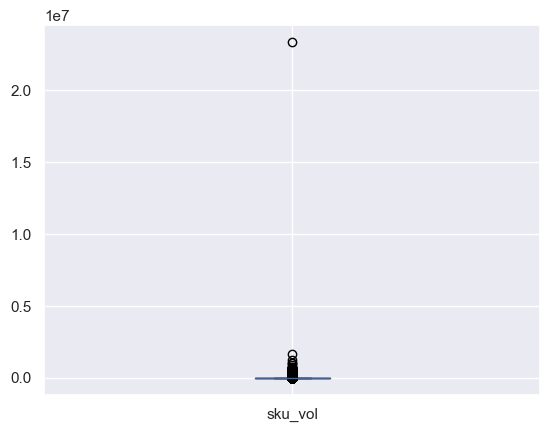

In [38]:
df['sku_vol'].plot(kind='box')

In [39]:
# дроп выбросов по объему
q1 = df['sku_vol'].quantile(0.25)
q3 = df['sku_vol'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_no_outlier_vol = df[(df['sku_vol'] >= lower_bound) & (df['sku_vol'] <= upper_bound)]

In [40]:
# для категорий товаров
# df.describe()
# cols_zero_max = df.describe().columns[df.describe().loc['max'] == 0]
# cols_zero_max
# df = df.drop(cols_zero_max, axis=1)

In [41]:
numeric_columns = df.loc[:,df.dtypes!=np.object_].columns

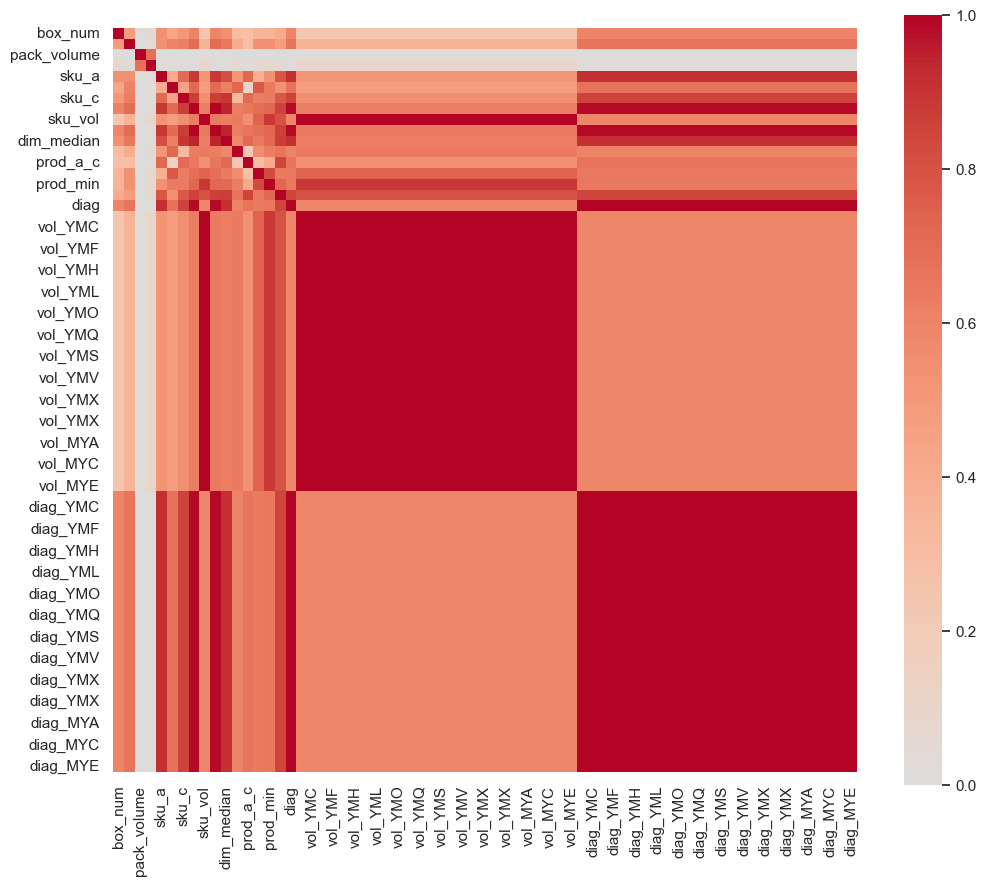

In [64]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_outlier_vol.corr(), 
            #annot=True, 
            vmin=0, 
            vmax=1, 
            center=0, 
            cmap='coolwarm', 
            square=True);

In [76]:
corr_feat = set()
corr_matrix = df_no_outlier_vol.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            colname = corr_matrix.columns[i]
            corr_feat.add(colname)       
corr_feat

{'diag',
 'diag_MYA',
 'diag_MYB',
 'diag_MYC',
 'diag_MYD',
 'diag_MYE',
 'diag_MYF',
 'diag_YMA',
 'diag_YMC',
 'diag_YME',
 'diag_YMF',
 'diag_YMG',
 'diag_YMH',
 'diag_YMJ',
 'diag_YML',
 'diag_YMN',
 'diag_YMO',
 'diag_YMP',
 'diag_YMQ',
 'diag_YMR',
 'diag_YMS',
 'diag_YMU',
 'diag_YMV',
 'diag_YMW',
 'diag_YMX',
 'diag_YMY',
 'diag_YMХ',
 'dim_mean',
 'dim_median',
 'dim_sum',
 'prod_mean',
 'prod_min',
 'vol_MYA',
 'vol_MYB',
 'vol_MYC',
 'vol_MYD',
 'vol_MYE',
 'vol_MYF',
 'vol_YMA',
 'vol_YMC',
 'vol_YME',
 'vol_YMF',
 'vol_YMG',
 'vol_YMH',
 'vol_YMJ',
 'vol_YML',
 'vol_YMN',
 'vol_YMO',
 'vol_YMP',
 'vol_YMQ',
 'vol_YMR',
 'vol_YMS',
 'vol_YMU',
 'vol_YMV',
 'vol_YMW',
 'vol_YMX',
 'vol_YMY',
 'vol_YMХ'}

In [150]:
fltr_nonpack =  ["STRETCH", "NONPACK"]

In [151]:
df_no_outlier_vol_nonpack = df_no_outlier_vol.query('selected_carton not in @fltr_nonpack')

In [152]:
df_no_outlier_vol_nonpack

,box_num,sel_calc_cube,pack_volume,goods_wght,sku_a,sku_b,sku_c,sku_vol,prod_a_b,prod_a_c,prod_b_c,selected_carton
9,1,8436,3456,3.050,24.0,8.0,18.0,3456.0,192.0,432.0,144.0,MYC
11,1,8436,2484,3.100,36.0,3.0,23.0,2484.0,108.0,828.0,69.0,MYC
16,1,26277,12142,1.618,24.2,11.2,44.8,12142.0,271.0,1084.0,501.0,MYE
17,7,187740,8375,5.754,56.9,120.5,56.3,8375.0,993.0,461.0,996.0,YMG
92,1,8436,2156,0.600,11.0,28.0,7.0,2156.0,308.0,77.0,196.0,MYC
...,...,...,...,...,...,...,...,...,...,...,...,...
163361,1,8525,4050,1.740,25.0,9.0,18.0,4050.0,225.0,450.0,162.0,YMC
163362,6,130872,12510,1.236,251.4,12.6,142.2,12510.0,522.0,5958.0,294.0,YMW
163364,2,9120,4160,0.200,52.0,40.0,8.0,4160.0,1040.0,208.0,160.0,MYC
163365,1,8525,3523,0.284,11.4,10.2,30.3,3523.0,116.0,345.0,309.0,YMC


In [ ]:
# Проверить
df_no_outlier_vol = df_no_outlier_vol.drop(corr_feat, axis=1)

# Модель

In [45]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score

In [153]:
df_no_outlier_vol_nonpack.head()

,box_num,sel_calc_cube,pack_volume,goods_wght,sku_a,sku_b,sku_c,sku_vol,prod_a_b,prod_a_c,prod_b_c,selected_carton
9,1,8436,3456,3.050,24.0,8.0,18.0,3456.0,192.0,432.0,144.0,MYC
11,1,8436,2484,3.100,36.0,3.0,23.0,2484.0,108.0,828.0,69.0,MYC
16,1,26277,12142,1.618,24.2,11.2,44.8,12142.0,271.0,1084.0,501.0,MYE
17,7,187740,8375,5.754,56.9,120.5,56.3,8375.0,993.0,461.0,996.0,YMG
92,1,8436,2156,0.600,11.0,28.0,7.0,2156.0,308.0,77.0,196.0,MYC


In [154]:
df_no_outlier_vol_nonpack = df_no_outlier_vol_nonpack.query('selected_carton != "YMB"')

In [155]:
X = df_no_outlier_vol_nonpack.drop(['sel_calc_cube', 'box_num', 'pack_volume', 'selected_carton'], axis=1)
X.columns = X.columns.astype(str)
y = df_no_outlier_vol_nonpack['selected_carton']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=RANDOM,
                                                    shuffle=True,
                                                    #stratify=df['selected_carton']
                                                    )

In [157]:
y_train.value_counts()

MYB    30764
MYC    22411
MYA    11496
MYD     9698
YMC     6001
YMA     5117
YMF     3017
MYE     2998
YMW     2557
YMG     1720
MYF      611
YME      202
YMX       20
YML        6
Name: selected_carton, dtype: int64

In [61]:
sm = SMOTE(random_state=RANDOM, k_neighbors = 3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
# для нейронки
# from sklearn.preprocessing import LabelEncoder
# # Создаем объект LabelEncoder
# label_encoder = LabelEncoder()

# # Преобразуем столбец с классами в числа
# y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.transform(y_test)

In [62]:
print(f'TRAIN ACC: {accuracy_score(y_train, pipe.predict(X_train))}')
print(f'TEST ACC: {accuracy_score(y_test, preds)}')

NameError: name 'pipe' is not defined

In [ ]:
f1_score(y_test, preds, average='weighted')

In [ ]:
print(classification_report(y_test, preds))

TREE

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
import keras
from tensorflow.keras import layers, callbacks

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from keras.metrics import BinaryAccuracy, AUC

from keras.models import Sequential
#from tensorflow import keras
from keras.layers import Dense, SimpleRNN, Activation, Conv1D, Flatten, MaxPooling1D, Dropout
from keras import optimizers

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping
    restore_best_weights=True,
)


model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(X_train.shape[1]*10, activation='relu', input_shape=[X_train.shape[1]]),
    
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    # layers.Dense(X_train.shape[1], activation='relu'),    
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    # layers.Dense(X_train.shape[1]//8, activation='relu'),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    # layers.Dense(X_train.shape[1]//16, activation='relu'),    
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    # layers.Dense(X_train.shape[1]//32, activation='relu'),
    layers.Dense(1, activation='relu'),
    #layers.Activation('sigmoid')
])

adam = optimizers.Adam(learning_rate=0.0001) #  0.0001 'optimizer': ['adadelta', 'rmsprop', 'adam'] learning_rate = 0.00001

model.compile(
    optimizer=adam,
    #optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
y_train[:5]

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=640,
    epochs=5000,
    verbose=1,
    callbacks=[early_stopping],
)

In [168]:
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

In [203]:
tree_pipe = Pipeline([
    #('scaler', StandardScaler()),
    #('scaler', RobustScaler()),
    #('pca', PCA(n_components=36)),
    ('tree', KNeighborsClassifier(n_neighbors=8, p=1)),

    
    # ('tree', CatBoostClassifier(
    #     #learning_rate=0.01, 
    #     #leaf_estimation_method='Gradient',
    #     #n_estimators=1000,
    #     #subsample=0.1,
    #     #max_depth=4,
    #     verbose=100,
    #     #l2_leaf_reg = 7,
    #     #bootstrap_type="Bernoulli",
    #     #class_weights='Balanced',#[1, 1, 1],
    #     loss_function='MultiClass',
    #     eval_metric='TotalF1'
    #     ))
])
# params = {
#     'leaf_estimation_method': 'Gradient',
#     'learning_rate': 0.01,
#     'max_depth': 8,
#     'bootstrap_type': 'Bernoulli',
#     'objective': 'MultiClass',
#     'subsample': 0.8,
#     'random_state': 42,
#     'verbose': 0,
#     "eval_metric" : 'TotalF1',
#     "early_stopping_rounds" : 100
#     }
tree_pipe.fit(X_train, y_train)#X_train_res, y_train_res
#tree_pipe.fit(X_train_res, y_train_res)#

Pipeline(steps=[('tree', KNeighborsClassifier(n_neighbors=8, p=1))])

In [178]:

feature_importance = tree_pipe.named_steps['tree'].get_feature_importance()
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

AttributeError: 'KNeighborsClassifier' object has no attribute 'get_feature_importance'

In [170]:
tree_pipe.named_steps['tree'].get_feature_importance()

AttributeError: 'KNeighborsClassifier' object has no attribute 'get_feature_importance'

In [204]:
tree_preds = tree_pipe.predict(X_test)

In [205]:
tree_pred_proba = tree_pipe.predict_proba(X_test)

tree_pred_proba[1]

array([0.125, 0.   , 0.625, 0.125, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.125, 0.   ])

In [206]:
tree_pipe.classes_

array(['MYA', 'MYB', 'MYC', 'MYD', 'MYE', 'MYF', 'YMA', 'YMC', 'YME',
       'YMF', 'YMG', 'YML', 'YMW', 'YMX'], dtype=object)

In [207]:
print(f'TRAIN ACC: {accuracy_score(y_train, tree_pipe.predict(X_train))}')
print(f'TEST ACC: {accuracy_score(y_test, tree_preds)}')

TRAIN ACC: 0.558363865946304
TEST ACC: 0.4674139162293911


In [208]:
f1_score(y_test, tree_preds, average='weighted')

0.4535841553457953

In [209]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

         MYA       0.49      0.48      0.49      3812
         MYB       0.56      0.66      0.61     10166
         MYC       0.46      0.49      0.47      7481
         MYD       0.38      0.38      0.38      3328
         MYE       0.28      0.17      0.21      1020
         MYF       0.00      0.00      0.00       233
         YMA       0.37      0.18      0.24      1713
         YMC       0.32      0.25      0.28      1990
         YME       0.13      0.05      0.08        74
         YMF       0.25      0.19      0.21      1019
         YMG       0.34      0.30      0.32       574
         YML       0.00      0.00      0.00         1
         YMW       0.27      0.21      0.24       790
         YMX       0.00      0.00      0.00         6

    accuracy                           0.47     32207
   macro avg       0.27      0.24      0.25     32207
weighted avg       0.45      0.47      0.45     32207

